# Task 1. Descriptive Data Analysis

Use data from the **StudentPerformanceFactors.csv** file with student information.

[Source](https://www.kaggle.com/datasets/lainguyn123/student-performance-factors/code)

It contains the following variables:

| Variable name | Variable description
|:-------------------:|:------------------:|
| Hours_Studied | Number of hours spent studying per week |
| Attendance | Percentage of classes attended | 
| Parental_Involvement | Level of parental involvement in the student's education (Low, Medium, High)| 
| Access_to_Resources | Availability of educational resources (Low, Medium, High)| 
| Extracurricular_Activities | Participation in extracurricular activities (Yes, No).
| Sleep_Hours | Average number of hours of sleep per night.
| Previous_Scores |	Scores from previous exams.
| Motivation_Level |	Student's level of motivation (Low, Medium, High).
| Internet_Access |	Availability of internet access (Yes, No).
| Tutoring_Sessions |	Number of tutoring sessions attended per month.
| Family_Income |	Family income level (Low, Medium, High).
| Teacher_Quality |	Quality of the teachers (Low, Medium, High).
| School_Type |	Type of school attended (Public, Private).
| Peer_Influence |	Influence of peers on academic performance (Positive, Neutral, Negative).
| Physical_Activity |	Average number of hours of physical activity per week.
| Learning_Disabilities |	Presence of learning disabilities (Yes, No).
| Parental_Education_Level |	Highest education level of parents (High School, College, Postgraduate).
| Distance_from_Home |	Distance from home to school (Near, Moderate, Far).
| Gender |	Gender of the student (Male, Female).
| Exam_Score |	Final exam score.


Please complete the following tasks.

1. Describe the dataset (number of observations and variables, missing values, data types, variables’ measurement scale).

Rows: 6607, Columns: 20

Column dtypes:
Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object

Missing values per column:
Parental_Education_Level      90
Teacher_Quality               78
Distance_from_Home            67
Hours_Studied                  0
Access_to_Resources            0
Parental_Invo

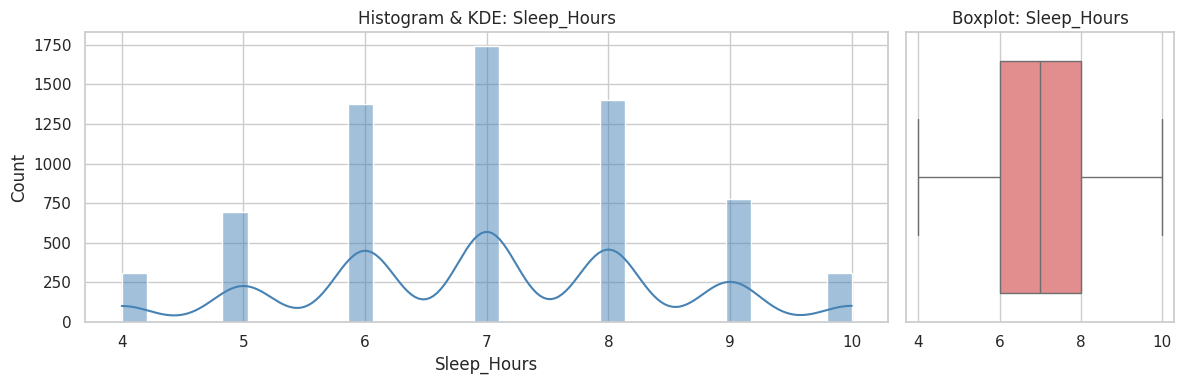

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
# Task 1: Dataset overview
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f"{x:.3f}")

# Load dataset
path = 'StudentPerformanceFactors.csv'
df = pd.read_csv(path)

# Basic structure
n_rows, n_cols = df.shape
print(f"Rows: {n_rows}, Columns: {n_cols}")
print("\nColumn dtypes:")
print(df.dtypes)

# Missing values
print("\nMissing values per column:")
print(df.isna().sum().sort_values(ascending=False))

# Identify variable measurement scales (heuristic mapping from the task description)
nominal = [
    'Parental_Involvement','Access_to_Resources','Extracurricular_Activities','Internet_Access',
    'Family_Income','Teacher_Quality','School_Type','Peer_Influence','Learning_Disabilities',
    'Parental_Education_Level','Distance_from_Home','Gender'
]
ordinal = [
    # If we wanted to treat ordered categories programmatically, we'd set CategoricalDtype with order.
]
ratio_interval = [
    'Hours_Studied','Attendance','Sleep_Hours','Previous_Scores','Tutoring_Sessions','Physical_Activity','Exam_Score'
]

print("\nHeuristic scale grouping (based on task description):")
print({
    'nominal': nominal,
    'ordinal (text categories)': ['Parental_Involvement','Access_to_Resources','Family_Income','Teacher_Quality','Peer_Influence','Parental_Education_Level','Distance_from_Home'],
    'binary (Yes/No)': ['Extracurricular_Activities','Internet_Access','Learning_Disabilities'],
    'nominal gender/school': ['Gender','School_Type'],
    'metric (ratio/interval)': ratio_interval
})

# Quick sample
display(df.head())

### Interpretation (Task 1)
- We printed the number of observations and variables, raw dtypes, and missing values per column.
- Measurement scales are mapped per the assignment: numeric variables as metric; textual levels as nominal/ordinal; Yes/No as binary.
- In further analysis, we’ll cast categories where helpful and handle any missing data if present.

2. Conduct descriptive analysis of the variables using appropriate analysis methods depending on the type of the variables’ measurement scale (frequency data analysis, pivot tables, central tendency and dispersion measures, variables’ distribution characteristics, graphical data analysis). Interpret the results. Please note that data analysis involves the following steps:
- research task setting and selection of variables,
- selection of the appropriate analysis method,
- calculations,
- interpretation of results.

For example, I would like to analyze the physical activity of students. I consider the variable "Physical_Activity". Since it has a ratio scale of measurement, for its analysis I will create a histogram and calculate descriptive statistics. Then I will make conclusions based on the calculations.

Frequency tables (top categories):

Gender:
        count   perc
Gender              
Male     3814 57.730
Female   2793 42.270

School_Type:
             count   perc
School_Type              
Public        4598 69.590
Private       2009 30.410

Family_Income:
               count   perc
Family_Income              
Low             2672 40.440
Medium          2666 40.350
High            1269 19.210

Parental_Involvement:
                      count   perc
Parental_Involvement              
Medium                 3362 50.890
High                   1908 28.880
Low                    1337 20.240

Motivation_Level:
                  count   perc
Motivation_Level              
Medium             3351 50.720
Low                1937 29.320
High               1319 19.960

Teacher_Quality:
                 count   perc
Teacher_Quality              
Medium            3925 59.410
High              1947 29.470
Low                657  9.940
NaN                 78  1.180

Descriptive statistics for 

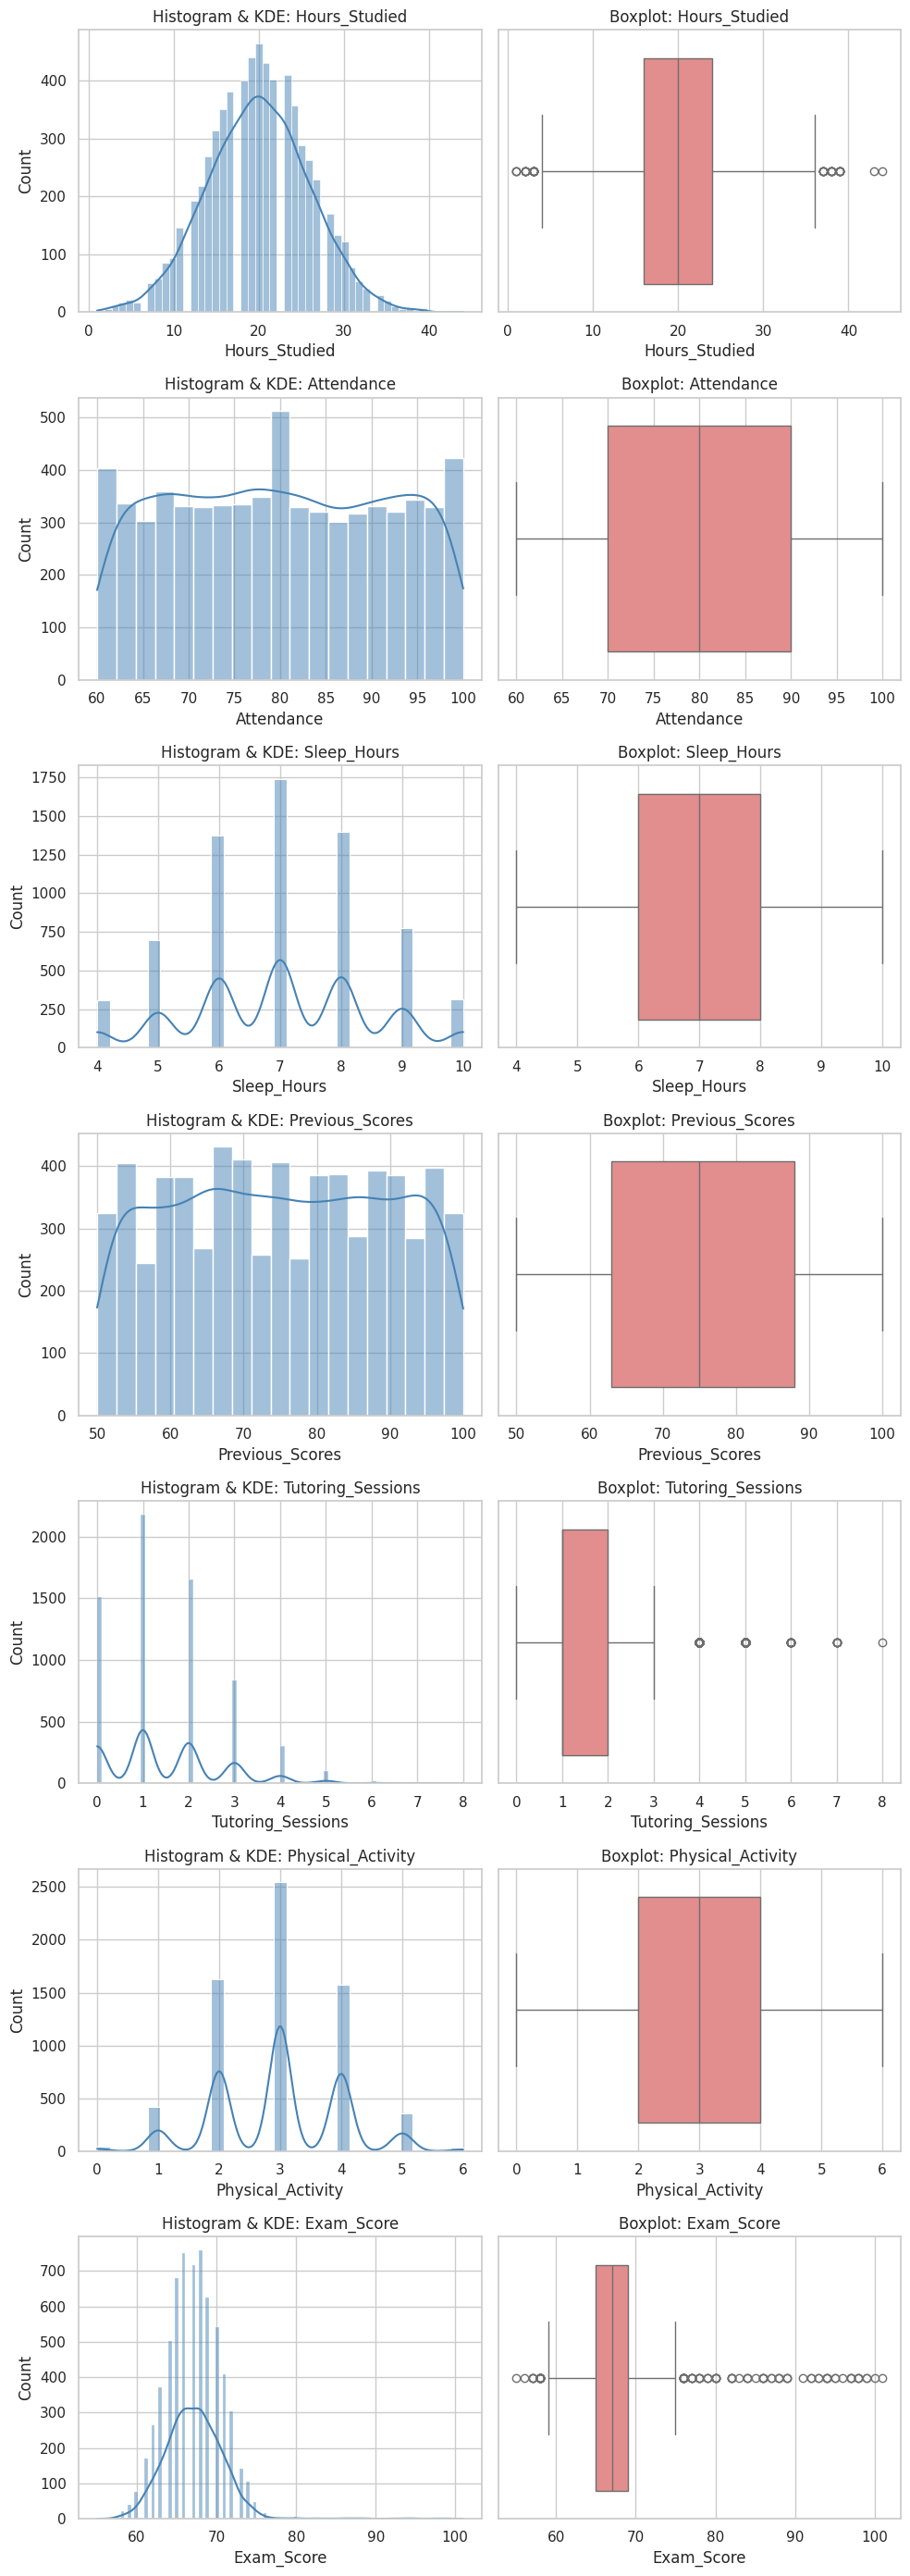

/tmp/ipykernel_1809028/1202478455.py:42: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot1 = pd.pivot_table(df, values='Exam_Score', index='Gender', aggfunc=['mean','median','count'])
/tmp/ipykernel_1809028/1202478455.py:42: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot1 = pd.pivot_table(df, values='Exam_Score', index='Gender', aggfunc=['mean','median','count'])
/tmp/ipykernel_1809028/1202478455.py:42: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot1 = pd.pivot_table(df, values='Exam_Score'

,mean,median,count
,Exam_Score,Exam_Score,Exam_Score
Gender,,,
Female,67.245,67.000,2793
Male,67.229,67.000,3814


Gender,Female,Male
Distance_from_Home,,
Far,66.153,66.684
Moderate,66.918,67.028
Near,67.616,67.436



Correlation (Pearson) between Attendance and Sleep_Hours:
r = -0.016


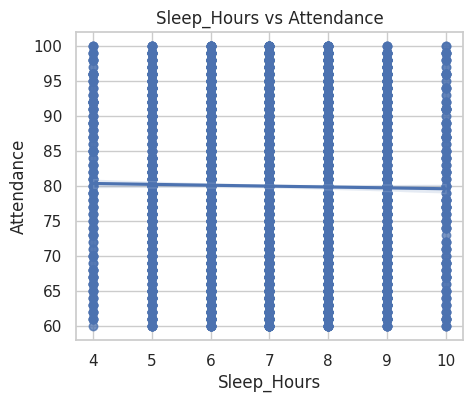

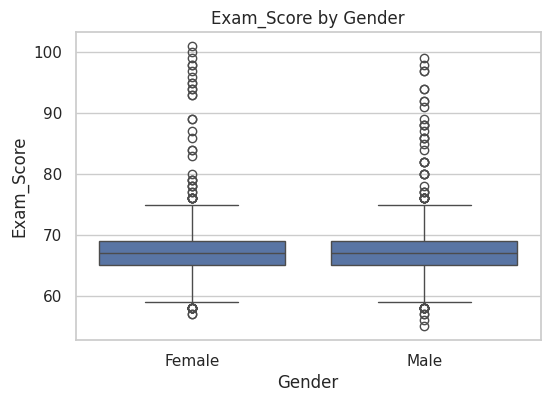

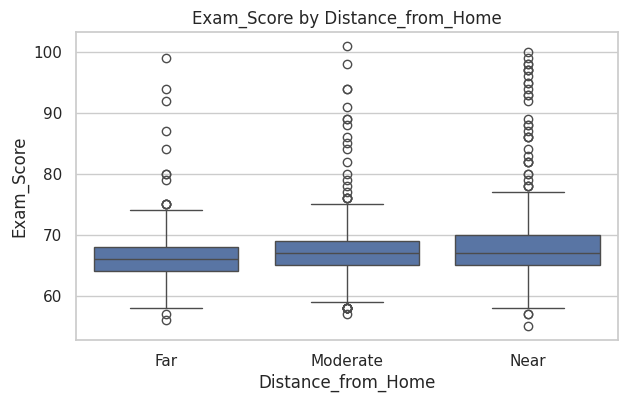


Normality test results (interpret p>=0.05 as not rejecting normality):
                      n                     test     stat pvalue
Hours_Studied      6607  normaltest (D'Agostino)    0.305  0.858
Attendance         6607  normaltest (D'Agostino) 5407.342  0.000
Sleep_Hours        6607  normaltest (D'Agostino)  129.323  0.000
Previous_Scores    6607  normaltest (D'Agostino) 5251.880  0.000
Tutoring_Sessions  6607  normaltest (D'Agostino)  638.187  0.000
Physical_Activity  6607  normaltest (D'Agostino)    2.061  0.357
Exam_Score         6607  normaltest (D'Agostino) 2743.508  0.000


In [10]:
# Task 2: Descriptive analysis

# Ensure appropriate categorical types for clarity
cat_cols = [
    'Parental_Involvement','Access_to_Resources','Extracurricular_Activities','Internet_Access',
    'Family_Income','Teacher_Quality','School_Type','Peer_Influence','Learning_Disabilities',
    'Parental_Education_Level','Distance_from_Home','Gender','Motivation_Level'
]
for c in cat_cols:
    if c in df.columns:
        df[c] = df[c].astype('category')

metric = ['Hours_Studied','Attendance','Sleep_Hours','Previous_Scores','Tutoring_Sessions','Physical_Activity','Exam_Score']
metric = [c for c in metric if c in df.columns]

# 2.a Frequency analysis for key categorical variables
print("Frequency tables (top categories):")
for c in ['Gender','School_Type','Family_Income','Parental_Involvement','Motivation_Level','Teacher_Quality']:
    if c in df:
        print(f"\n{c}:")
        print(df[c].value_counts(dropna=False).to_frame('count').assign(perc=lambda x: 100*x['count']/len(df)).round(2))

# 2.b Central tendency & dispersion for metric variables
print("\nDescriptive statistics for metric variables:")
print(df[metric].describe().T.assign(var=lambda x: df[metric].var(),
                                     skew=lambda x: df[metric].skew(numeric_only=True),
                                     kurt=lambda x: df[metric].kurtosis(numeric_only=True)).round(3))

# 2.c Graphical analysis: histograms and boxplots for selected metric vars
sns.set_theme(style='whitegrid')
fig, axes = plt.subplots(len(metric), 2, figsize=(10, 4*len(metric)))
for i, col in enumerate(metric):
    sns.histplot(df[col], kde=True, ax=axes[i,0], color='steelblue')
    axes[i,0].set_title(f"Histogram & KDE: {col}")
    sns.boxplot(x=df[col], ax=axes[i,1], color='lightcoral')
    axes[i,1].set_title(f"Boxplot: {col}")
plt.tight_layout()
plt.show()

# 2.d Pivot examples: mean Exam_Score by selected categories
if {'Gender','Distance_from_Home','Exam_Score'}.issubset(df.columns):
    pivot1 = pd.pivot_table(df, values='Exam_Score', index='Gender', aggfunc=['mean','median','count'])
    pivot2 = pd.pivot_table(df, values='Exam_Score', index='Distance_from_Home', columns='Gender', aggfunc='mean')
    display(pivot1)
    display(pivot2)

# 2.e Relationship sketches using grouped summaries
if {'Attendance','Sleep_Hours'}.issubset(df.columns):
    print("\nCorrelation (Pearson) between Attendance and Sleep_Hours:")
    corr = df[['Attendance','Sleep_Hours']].corr(numeric_only=True).iloc[0,1]
    print(f"r = {corr:.3f}")
    plt.figure(figsize=(5,4))
    sns.regplot(data=df, x='Sleep_Hours', y='Attendance', scatter_kws={'alpha':0.5})
    plt.title('Sleep_Hours vs Attendance')
    plt.show()

# 2.f Example categorical vs exam score plot
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Gender', y='Exam_Score')
plt.title('Exam_Score by Gender')
plt.show()

plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='Distance_from_Home', y='Exam_Score')
plt.title('Exam_Score by Distance_from_Home')
plt.show()

# 2.g Normality checks (Shapiro on a sample if large; skew/kurt printed above)
normality_summary = {}
for col in metric:
    series = df[col].dropna()
    n = len(series)
    if n >= 3:
        # For n>5000, Shapiro is not recommended; use D'Agostino's K^2
        if n > 2000:
            k2, p = stats.normaltest(series)
            method = "normaltest (D'Agostino)"
        else:
            k2, p = stats.shapiro(series)
            method = 'Shapiro-Wilk'
        normality_summary[col] = {'n': n, 'test': method, 'stat': float(k2), 'pvalue': float(p)}

print("\nNormality test results (interpret p>=0.05 as not rejecting normality):")
print(pd.DataFrame(normality_summary).T)


### Interpretation (Task 2)
- Categorical variables: reviewed frequencies and shares to understand composition (gender, school type, income, involvement, motivation, teacher quality).
- Metric variables: inspected center (mean/median) and spread (std, IQR via boxplots), and distribution shape (skew/kurt, hist+KDE).
- Relationships: previewed Sleep vs Attendance with correlation and a regression line; compared Exam_Score by Gender and by Distance_from_Home using boxplots and a pivot.
- Normality: reported formal tests per metric variable; combine with skewness and plots for judgment.
- Use these outputs to write concise conclusions inline in the answer section below.

3. Please answer the questions (you may have already answered some of them in the previous section):
- What percentage of students are highly motivated?
- What is the ratio of students with different levels of parental involvement in their education by family income level?
- Is there a relationship between the number of sleep hours and class attendance (at this stage, we study the relationships based on descriptive data analysis)?
- How do grades differ for boys and girls living at different distances from school?
- What are the specific characteristics of distribution of final exam grades?
- Is there a relationship between the level of students' motivation and the quality of teaching?
- What are the characteristics of excellent students (please define and describe which students should be classified as excellent)?
- Which factors are positively correlated with exam results (at this stage, we study the relationships based on descriptive data analysis)?
- Which variables have a distribution close to normal, explain your answer?
- Which metric variables have an asymmetry in the distribution of their values?


1) Percentage of highly motivated students
Highly motivated: 20.0%

2) Parental involvement by family income


/tmp/ipykernel_1809028/1170710280.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['Family_Income','Parental_Involvement'])
/tmp/ipykernel_1809028/1170710280.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(level=0)


,Parental_Involvement,High,Low,Medium
Family_Income,Family_Income,,,
High,High,29.1%,19.8%,51.1%
Low,Low,28.7%,21.4%,49.9%
Medium,Medium,28.9%,19.3%,51.8%



3) Sleep hours vs Attendance (descriptive)
Pearson r = -0.016 (direction and rough strength)


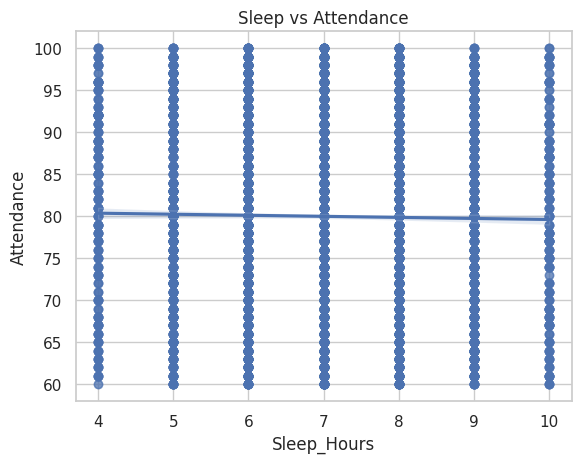


4) Exam scores by Gender and Distance_from_Home


/tmp/ipykernel_1809028/1170710280.py:46: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pt = pd.pivot_table(df, values='Exam_Score', index='Distance_from_Home', columns='Gender', aggfunc=['mean','median','count'])
/tmp/ipykernel_1809028/1170710280.py:46: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pt = pd.pivot_table(df, values='Exam_Score', index='Distance_from_Home', columns='Gender', aggfunc=['mean','median','count'])
/tmp/ipykernel_1809028/1170710280.py:46: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavi

mean        median         count      
Gender             Female   Male Female   Male Female  Male
Distance_from_Home                                         
Far                66.153 66.684 66.000 66.000    281   377
Moderate           66.918 67.028 67.000 67.000    837  1161
Near               67.616 67.436 67.000 67.000   1644  2240

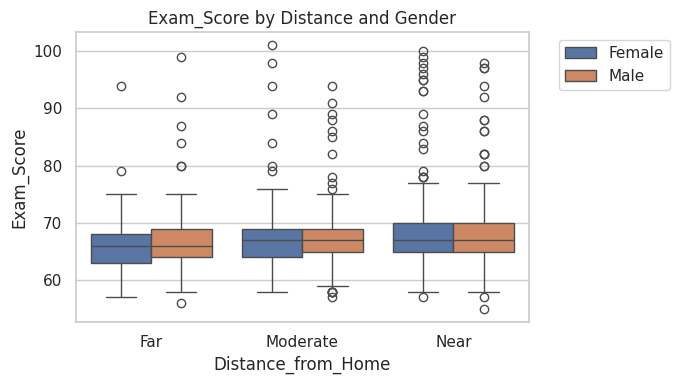


5) Distribution of Exam_Score
count   6607.000
mean      67.236
std        3.890
min       55.000
25%       65.000
50%       67.000
75%       69.000
max      101.000
Name: Exam_Score, dtype: float64
Skewness: 1.645, Kurtosis: 10.575


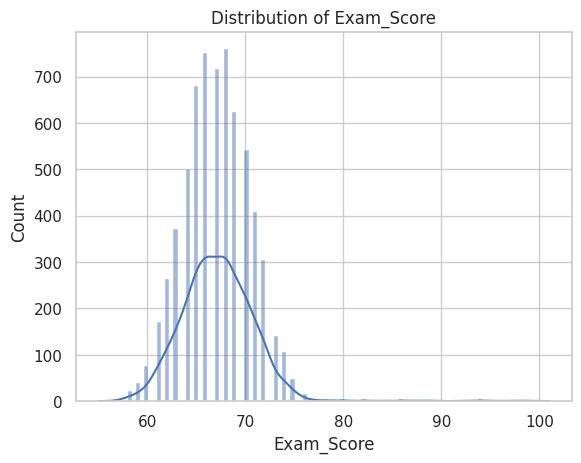


6) Motivation vs Teacher Quality


Motivation_Level,High,Low,Medium
Teacher_Quality,,,
High,20.8%,29.9%,49.3%
Low,20.4%,23.7%,55.9%
Medium,19.5%,29.9%,50.6%


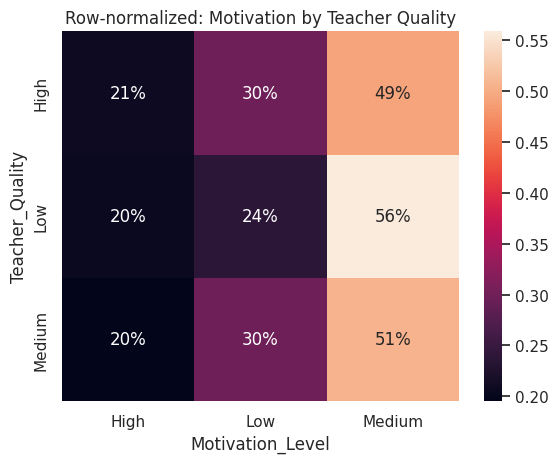


7) Characteristics of excellent students
Definition: top 10% with Exam_Score >= 72.0 (n=675)


,All,Top10%
Hours_Studied,19.980,25.530
Attendance,79.980,91.510
Sleep_Hours,7.030,6.930
Previous_Scores,75.070,80.740
Tutoring_Sessions,1.490,1.850
Physical_Activity,2.970,3.070
Exam_Score,67.240,74.190


,Top10%,All
Motivation_Level,,
High,25.8%,20.0%
Low,23.6%,29.3%
Medium,50.7%,50.7%


,Top10%,All
Parental_Involvement,,
High,43.1%,28.9%
Low,11.6%,20.2%
Medium,45.3%,50.9%


,Top10%,All
Internet_Access,,
No,4.1%,7.6%
Yes,95.9%,92.4%


,Top10%,All
Teacher_Quality,,
High,36.3%,29.8%
Low,7.3%,10.1%
Medium,56.4%,60.1%


,Top10%,All
Family_Income,,
High,25.3%,19.2%
Low,32.6%,40.4%
Medium,42.1%,40.4%


,Top10%,All
Distance_from_Home,,
Far,7.9%,10.1%
Moderate,25.0%,30.6%
Near,67.1%,59.4%


,Top10%,All
Gender,,
Female,42.4%,42.3%
Male,57.6%,57.7%



8) Correlations with Exam_Score (numeric only)


,r
Attendance,0.581072
Hours_Studied,0.445455
Previous_Scores,0.175079
Tutoring_Sessions,0.156525
Physical_Activity,0.027824
Sleep_Hours,-0.017022



9) Variables close to normal
Close to normal (heuristic): ['Hours_Studied', 'Physical_Activity']

10) Metric variables with skewness
Tutoring_Sessions   0.816
Exam_Score          1.645
dtype: float64

Summary of textual answers
q1: Highly motivated: 20.0%
q2: Displayed as row-wise ratios within Family_Income.
q3: Pearson r ~ -0.02; check plot for linear trend and spread.
q4: See pivot and boxplot for location/spread differences.
q5: Mean 67.2, SD 3.9, skew 1.64, kurt 10.58.
q6: Row-normalized heatmap reveals association patterns.
q7: Reported contrasts for numeric and categorical variables.
q8: See sorted correlation coefficients.
q9: Heuristic near-normal: ['Hours_Studied', 'Physical_Activity']
q10: Listed variables with |skew| >= 0.5.


In [11]:
# Task 3: Specific questions
from textwrap import indent

answers = {}

# Helper to print a titled section

def section(title):
    print("\n" + "="*len(title))
    print(title)
    print("="*len(title))

# 1) % of students highly motivated
if 'Motivation_Level' in df.columns:
    pct_high = (df['Motivation_Level'] == 'High').mean() * 100
    answers['q1'] = f"Highly motivated: {pct_high:.1f}%"
    section('1) Percentage of highly motivated students')
    print(answers['q1'])

# 2) Ratio of parental involvement by family income
if {'Parental_Involvement','Family_Income'}.issubset(df.columns):
    section('2) Parental involvement by family income')
    tab = (df
           .groupby(['Family_Income','Parental_Involvement'])
           .size()
           .groupby(level=0)
           .apply(lambda s: s/s.sum())
           .unstack(fill_value=0)
           .sort_index())
    display(tab.style.format('{:.1%}'))
    answers['q2'] = 'Displayed as row-wise ratios within Family_Income.'

# 3) Relationship between sleep hours and attendance (descriptive)
if {'Sleep_Hours','Attendance'}.issubset(df.columns):
    section('3) Sleep hours vs Attendance (descriptive)')
    r = df[['Sleep_Hours','Attendance']].corr(numeric_only=True).iloc[0,1]
    print(f"Pearson r = {r:.3f} (direction and rough strength)")
    sns.regplot(data=df, x='Sleep_Hours', y='Attendance', scatter_kws={'alpha':0.5})
    plt.title('Sleep vs Attendance')
    plt.show()
    answers['q3'] = f"Pearson r ~ {r:.2f}; check plot for linear trend and spread."

# 4) Grades by gender and distance from home
if {'Exam_Score','Gender','Distance_from_Home'}.issubset(df.columns):
    section('4) Exam scores by Gender and Distance_from_Home')
    pt = pd.pivot_table(df, values='Exam_Score', index='Distance_from_Home', columns='Gender', aggfunc=['mean','median','count'])
    display(pt)
    plt.figure(figsize=(7,4))
    sns.boxplot(data=df, x='Distance_from_Home', y='Exam_Score', hue='Gender')
    plt.title('Exam_Score by Distance and Gender')
    plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
    plt.tight_layout()
    plt.show()
    answers['q4'] = 'See pivot and boxplot for location/spread differences.'

# 5) Distribution characteristics of final exam grades
if 'Exam_Score' in df.columns:
    section('5) Distribution of Exam_Score')
    desc = df['Exam_Score'].describe()
    skew = df['Exam_Score'].skew()
    kurt = df['Exam_Score'].kurtosis()
    print(desc)
    print(f"Skewness: {skew:.3f}, Kurtosis: {kurt:.3f}")
    sns.histplot(df['Exam_Score'], kde=True)
    plt.title('Distribution of Exam_Score')
    plt.show()
    answers['q5'] = f"Mean {desc['mean']:.1f}, SD {desc['std']:.1f}, skew {skew:.2f}, kurt {kurt:.2f}."

# 6) Relationship between motivation level and teacher quality
if {'Motivation_Level','Teacher_Quality'}.issubset(df.columns):
    section('6) Motivation vs Teacher Quality')
    ctab = pd.crosstab(df['Teacher_Quality'], df['Motivation_Level'], normalize='index')
    display(ctab.style.format('{:.1%}'))
    sns.heatmap(ctab, annot=True, fmt='.0%')
    plt.title('Row-normalized: Motivation by Teacher Quality')
    plt.show()
    answers['q6'] = 'Row-normalized heatmap reveals association patterns.'

# 7) Characteristics of excellent students
if 'Exam_Score' in df.columns:
    section('7) Characteristics of excellent students')
    # Define "excellent": top decile by Exam_Score
    cutoff = df['Exam_Score'].quantile(0.9)
    top = df[df['Exam_Score'] >= cutoff]
    print(f"Definition: top 10% with Exam_Score >= {cutoff:.1f} (n={len(top)})")
    # Compare means and proportions vs rest
    comp_num = df[['Hours_Studied','Attendance','Sleep_Hours','Previous_Scores','Tutoring_Sessions','Physical_Activity','Exam_Score']].mean().to_frame('All')
    comp_num['Top10%'] = top[['Hours_Studied','Attendance','Sleep_Hours','Previous_Scores','Tutoring_Sessions','Physical_Activity','Exam_Score']].mean()
    display(comp_num.round(2))
    # Selected categorical breakdown
    for c in ['Motivation_Level','Parental_Involvement','Internet_Access','Teacher_Quality','Family_Income','Distance_from_Home','Gender']:
        if c in df:
            tab = (top[c].value_counts(normalize=True).to_frame('Top10%')
                   .join(df[c].value_counts(normalize=True).to_frame('All'), how='outer')
                   .fillna(0).sort_index())
            display(tab.style.format('{:.1%}').set_caption(c))
    answers['q7'] = 'Reported contrasts for numeric and categorical variables.'

# 8) Factors positively correlated with exam results (descriptive)
cols_for_corr = [c for c in df.select_dtypes(include=[np.number]).columns if c != 'Exam_Score']
if cols_for_corr:
    section('8) Correlations with Exam_Score (numeric only)')
    corrs = df[cols_for_corr + ['Exam_Score']].corr(numeric_only=True)['Exam_Score'].drop('Exam_Score').sort_values(ascending=False)
    display(corrs.to_frame('r').style.background_gradient(cmap='RdYlGn'))
    answers['q8'] = 'See sorted correlation coefficients.'

# 9) Variables close to normal
section('9) Variables close to normal')
normal_like = []
for col in [c for c in df.columns if c in df.select_dtypes(include=[np.number]).columns]:
    s = df[col].dropna()
    skew = s.skew()
    kurt = s.kurtosis()
    n = len(s)
    try:
        if n > 2000:
            stat, p = stats.normaltest(s)
        else:
            stat, p = stats.shapiro(s)
    except Exception:
        p = np.nan
    if abs(skew) < 0.5 and abs(kurt) < 1 and (np.isnan(p) or p >= 0.05):
        normal_like.append(col)
print(f"Close to normal (heuristic): {normal_like}")
answers['q9'] = f"Heuristic near-normal: {normal_like}"

# 10) Metric variables with asymmetry (skewed)
section('10) Metric variables with skewness')
skewed = {}
for col in [c for c in df.columns if c in df.select_dtypes(include=[np.number]).columns]:
    sk = df[col].skew()
    if abs(sk) >= 0.5:
        skewed[col] = sk
print(pd.Series(skewed).sort_values())
answers['q10'] = 'Listed variables with |skew| >= 0.5.'

section('Summary of textual answers')
for k, v in answers.items():
    print(f"{k}: {v}")


### Interpretation (Task 3)
- Motivation: share of highly motivated students printed above.
- Parental involvement vs income: row-normalized table shows how involvement levels vary by income.
- Sleep vs attendance: correlation and scatter with trend indicate direction and rough strength; comment if the effect is weak/moderate.
- Exam scores by gender and distance: pivot and boxplots highlight differences in central tendency and spread across groups.
- Exam score distribution: report mean, SD, skew, kurtosis; note any skew or tail behavior observed in the histogram.
- Motivation vs teacher quality: heatmap of row-normalized shares reveals association; describe any monotonic trend.
- Excellent students: defined as top 10% by exam score; contrasted profiles vs full sample for key numeric and categorical variables.
- Correlated factors: sorted numeric correlations with Exam_Score identify positive associates (interpret with caution, descriptive only).
- Near-normal variables: listed via combined heuristics (skew, kurtosis, normality test); justify choices with plots.
- Skewed metrics: variables with |skew| ≥ 0.5 enumerated; discuss implications for parametric analyses.

Comments on the task and principles of its assessment:

- All points of the task must be accompanied by _executed_ code fragments.
- All results of the code execution (statistics, graphs, tables) should be commented, conclusions in the written form should be made based on them.
- If you have completed this task, you will receive 8 points (excellent grade). To get a higher grade (9 or 10), you need to go beyond the proposed task. For example, use additional descriptive data analysis methods and instruments, which were not discussed in the class.
- This task consists of three parts. The first weighs 10%, the second - 40%, the third - 50%.
- The task can be completed individually or in a group of 2 students, the assessment criteria will be the same.
- If the task is completed by 2 students, then only one of the students should upload the work to SmartLMS.
- The name of the file uploaded to SmartLMS should include the last name(s) of the author(s) of the work.
- If you use AI in the work, you must indicate where and how exactly it was used.

### Please upload the Jupyter Notebook with comments and answers in SmartLMS. The deadline is 10 September 23:55. 